## 기본 그래프에 필요한 정보를 넣는 시각화

In [1]:
library(ggplot2)
library(gcookbook)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



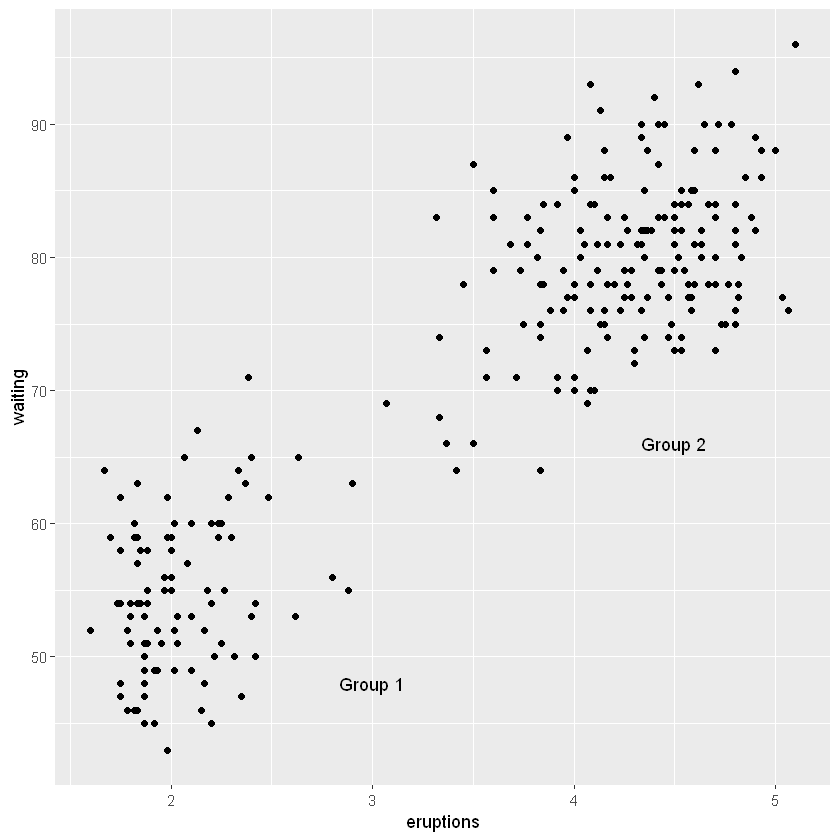

In [6]:
p <- ggplot(faithful, aes(x = eruptions, y = waiting)) + geom_point()
p + annotate('text', x = 3, y = 48, label = 'Group 1') +
  annotate('text', x = 4.5, y = 66, label = 'Group 2')

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"윈도우즈 폰트데이터베이스에서 찾을 수 없는 폰트페밀리입니다"


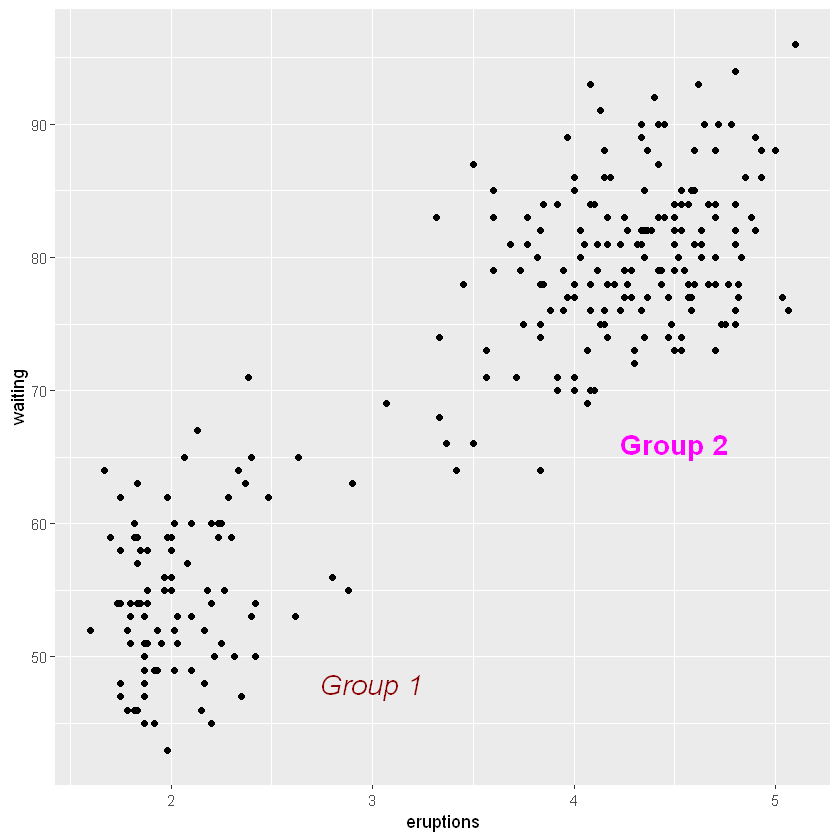

In [8]:
# 폰트 지정 = familiy
p + annotate('text', x = 3, y = 48, label = 'Group 1', family = 'Times', fontface = 'italic', color = 'darkred', size = 6) +
  annotate('text', x = 4.5, y = 66, label = 'Group 2', family = 'Times', fontface = 'bold', color = 'magenta', size = 6)

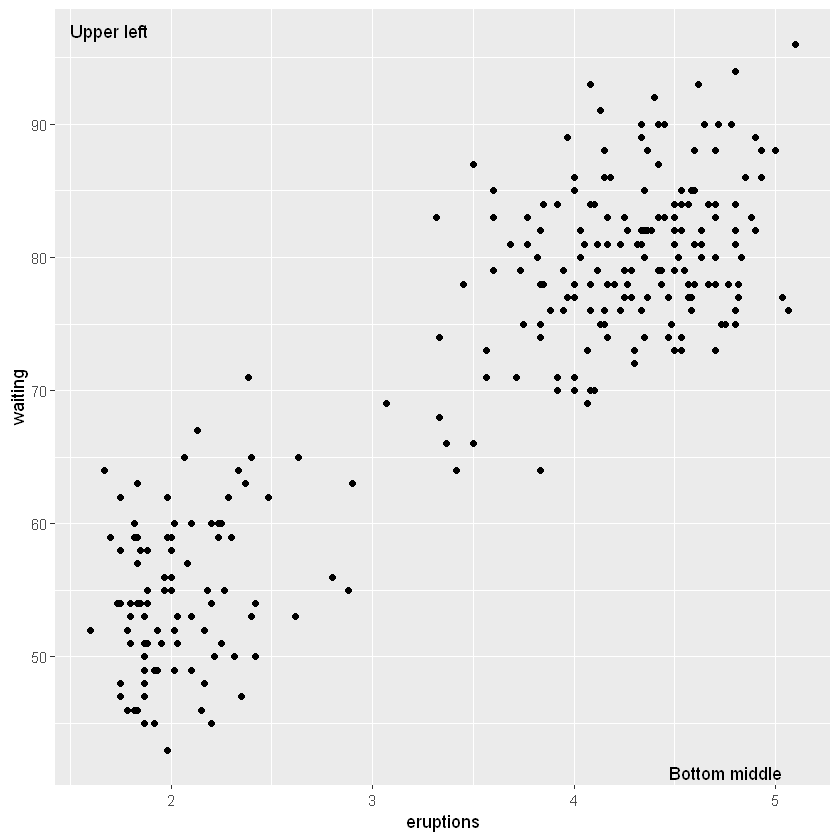

In [15]:
# hjust = -0.2, vjust = 2 가로 세로로 이동
p + annotate('text', x = -Inf, y = Inf, label = 'Upper left', hjust = -0.2, vjust = 2) +
  annotate('text', x = mean(range(faithful$eruptions)), y = -Inf, hjust = -2 ,vjust = -0.4, label = 'Bottom middle' )

In [18]:
?plotmath

plotmath {grDevices},R Documentation
Syntax,Meaning
x + y,x plus y
x - y,x minus y
x*y,juxtapose x and y
x/y,x forwardslash y
x %+-% y,x plus or minus y
x %/% y,x divided by y
x %*% y,x times y
x %.% y,x cdot y
x[i],x subscript i


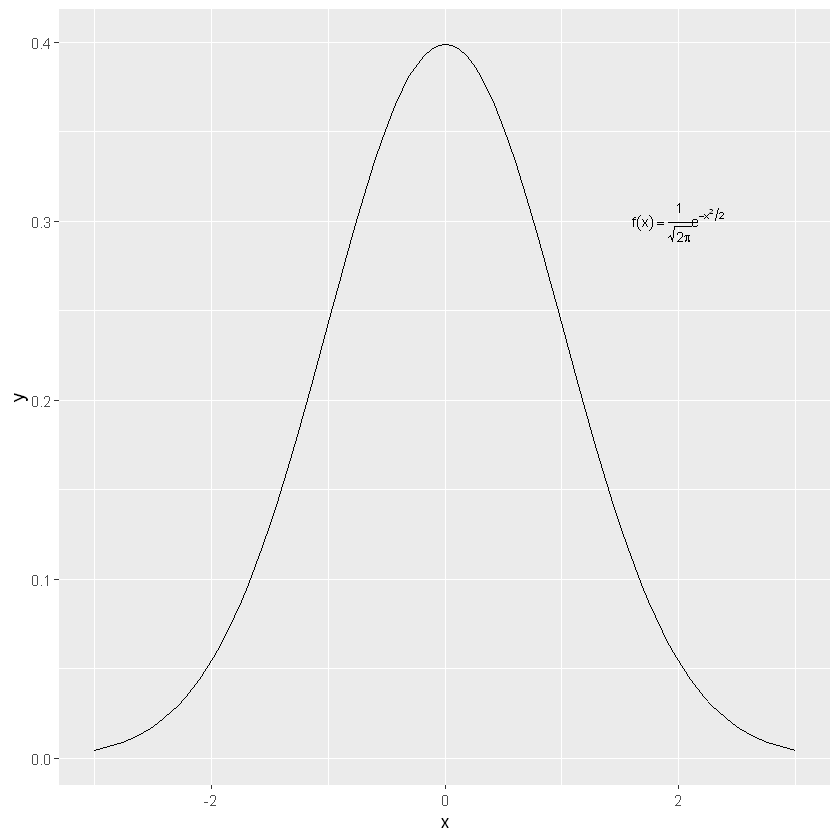

In [16]:
# parse = TRUE 수식임을 인지해준다 
# == -> 수식으로 인식한다.
p <- ggplot(data.frame(x = c(-3, 3)), aes(x = x)) + stat_function(fun = dnorm)
p + annotate('text', x = 2, y = 0.3, parse = TRUE, size = 3,
             label = 'f(x) == frac(1, sqrt(2*pi))* e^{-x^2 /2}')

### line 추가 

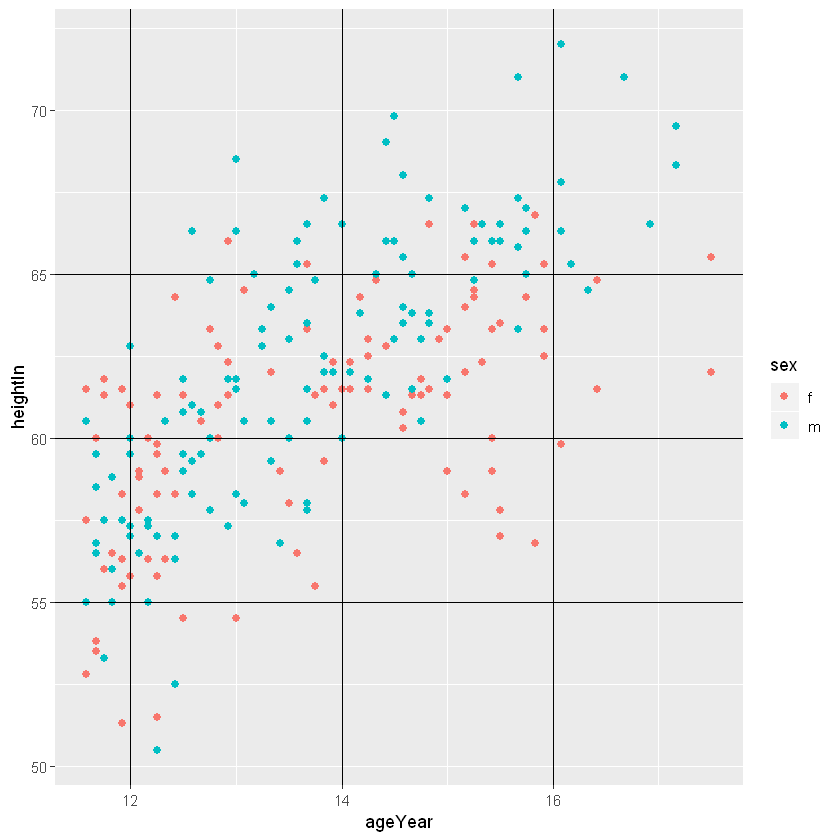

In [37]:
# 가로 세로 선 추가
p <- ggplot(heightweight, aes(x = ageYear, y = heightIn, color = sex)) + geom_point(size = 2)
p + geom_hline(yintercept = c(65, 55, 60)) + geom_vline(xintercept = c(12, 14, 16))

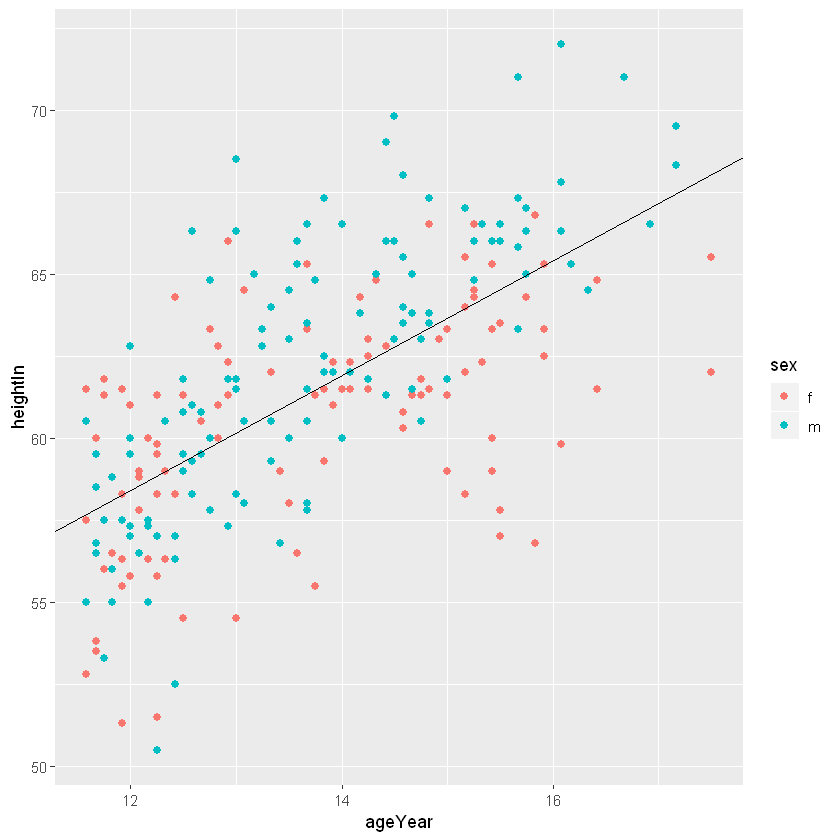

In [38]:
# 회귀 계수와 절편을 알 때 적합선
p + geom_abline(intercept = 37.4, slope = 1.75)

In [41]:
head(heightweight)

sex,ageYear,ageMonth,heightIn,weightLb
f,11.92,143,56.3,85.0
f,12.92,155,62.3,105.0
f,12.75,153,63.3,108.0
f,13.42,161,59.0,92.0
f,15.92,191,62.5,112.5
f,14.25,171,62.5,112.0


In [39]:
library(plyr)
hw_means <- ddply(heightweight, 'sex', summarise, heightIn = mean(heightIn))
hw_means

sex,heightIn
f,60.52613
m,62.06000


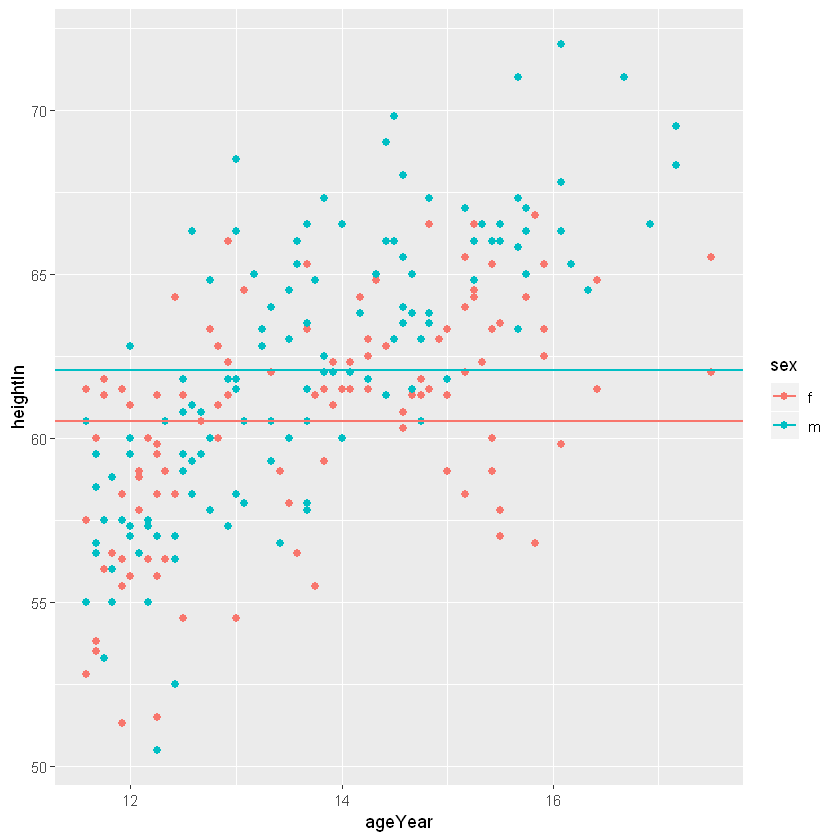

In [47]:
# 남자의 평균 키
# 여자의 평균 키 따로 선을 그리고 싶다
# 먼저 ddply로 각각의 평균을 구한다
# geom_hline 아니면 geom_vline으로 선을 그린다
p + geom_hline(data = hw_means, aes(yintercept = heightIn, 
                                   color = sex),
               size = 0.6
              )

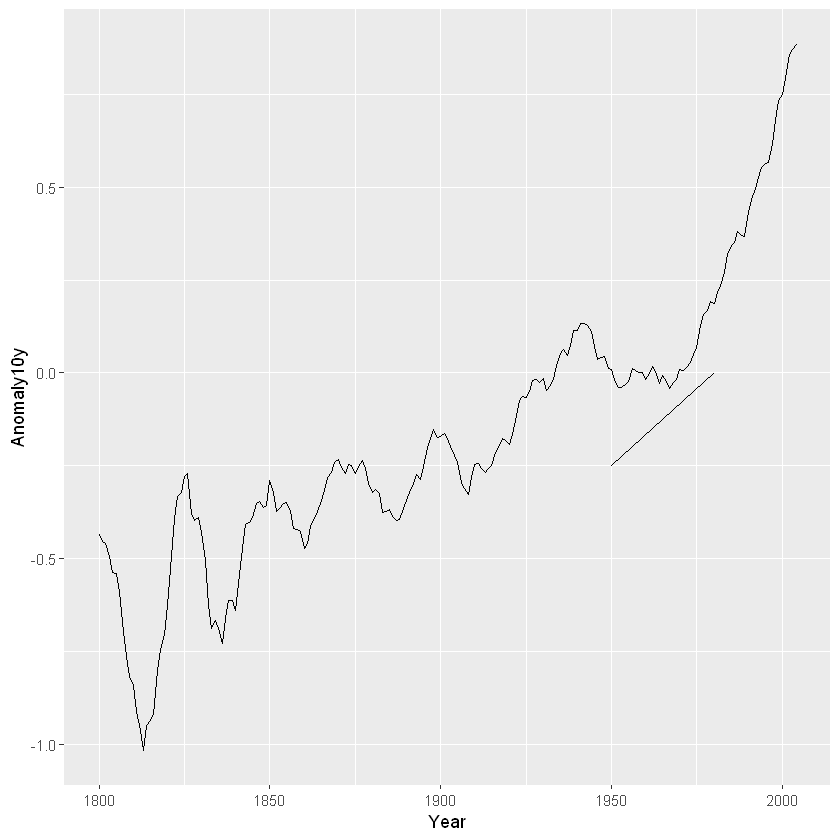

In [50]:
# annotate(‘segment’, ...) : 그래프에 선분을 나타냄.
p <- ggplot(subset(climate, Source == 'Berkeley'), aes(x = Year, y = Anomaly10y)) + 
  geom_line()
p + annotate('segment', x = 1950, xend = 1980, y = -0.25, yend = 0)

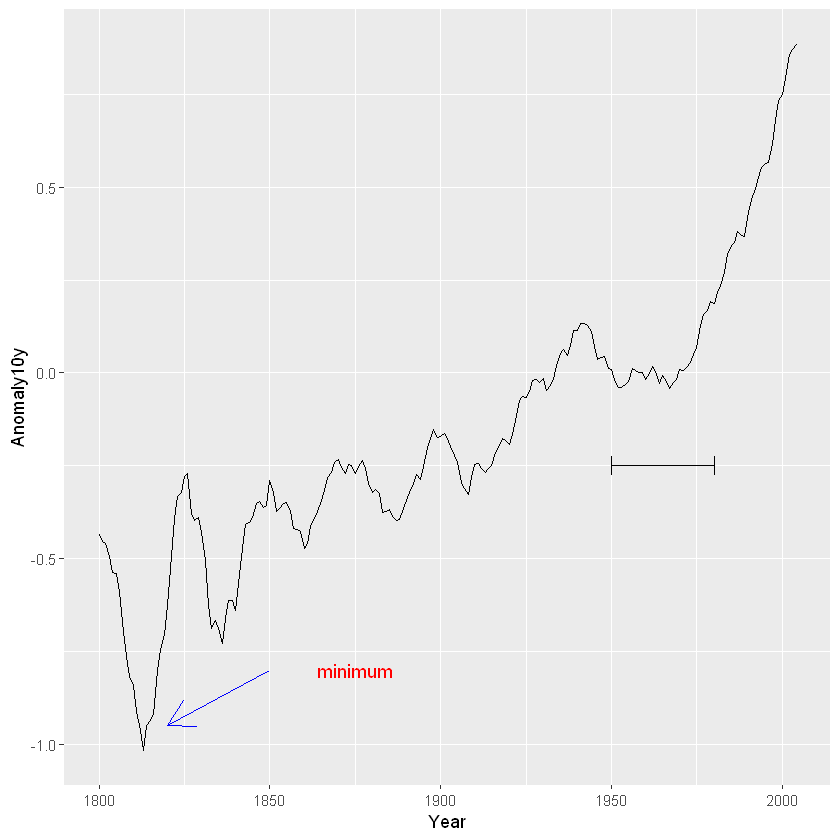

In [51]:
p <- ggplot(subset(climate, Source == 'Berkeley'), aes(x = Year, y = Anomaly10y)) + 
  geom_line()
p + annotate('segment', x = 1850, xend = 1820, y = -0.8, yend = -0.95, color = 'blue', 
             size = 0.5, arrow = arrow()) +
  annotate('segment', x = 1950, xend = 1980, y = -0.25, yend = -0.25, 
           arrow = arrow(ends = 'both', angle = 90, length = unit(0.2, 'cm'))) +
  annotate('text', x = 1875, y = -0.8, color = 'red', size = 4, label = 'minimum')

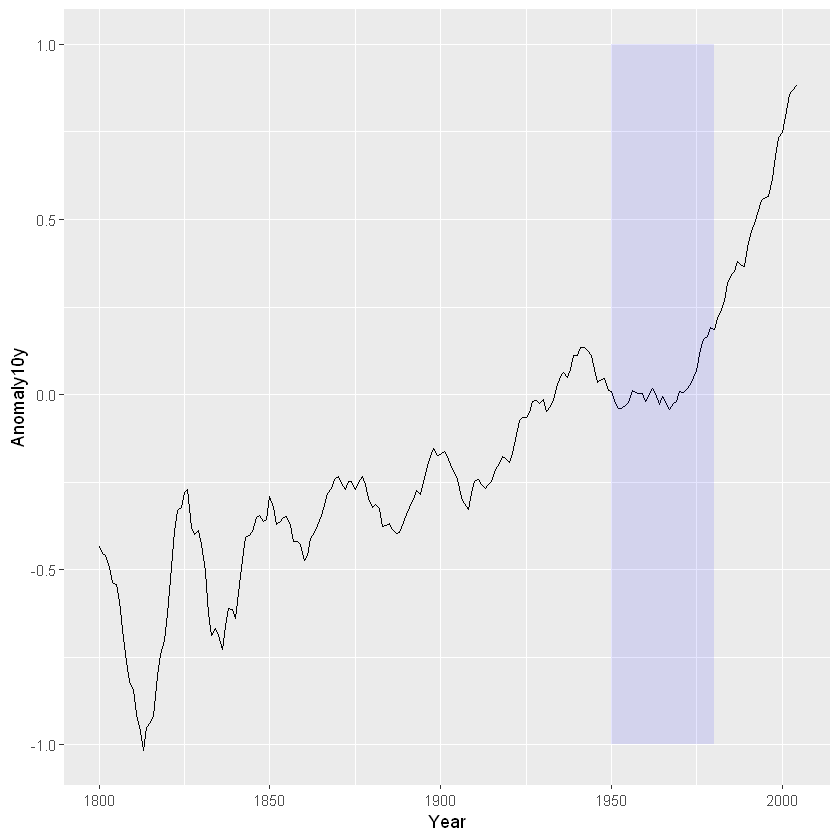

In [52]:
p <- ggplot(subset(climate, Source == 'Berkeley'), aes(x = Year, y = Anomaly10y)) + 
  geom_line()
p + annotate('rect', xmin = 1950, xmax = 1980, ymin = -1, ymax = 1, 
             alpha = 0.1, fill = 'blue')

In [54]:
ce <- subset(cabbage_exp, Cultivar == 'c39')
ce

Cultivar,Date,Weight,sd,n,se
c39,d16,3.18,0.9566144,10,0.30250803
c39,d20,2.80,0.2788867,10,0.08819171
c39,d21,2.74,0.9834181,10,0.31098410


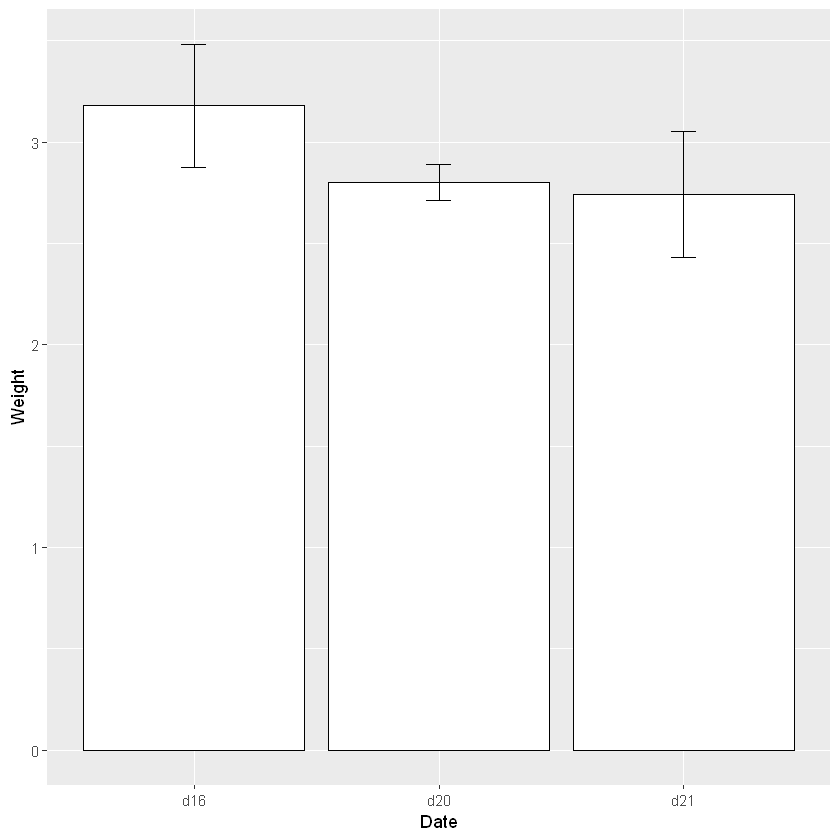

In [55]:
# geom_errorbar() : geom_bar()와 함께 사용함으로써 막대그래프에 신뢰구간 등을 표현할 수 있음
ggplot(ce, aes(x = Date, y = Weight)) +
  geom_col(fill = 'white', color = 'black') +
  geom_errorbar(aes(ymin = Weight - se, ymax = Weight + se), width = 0.1)

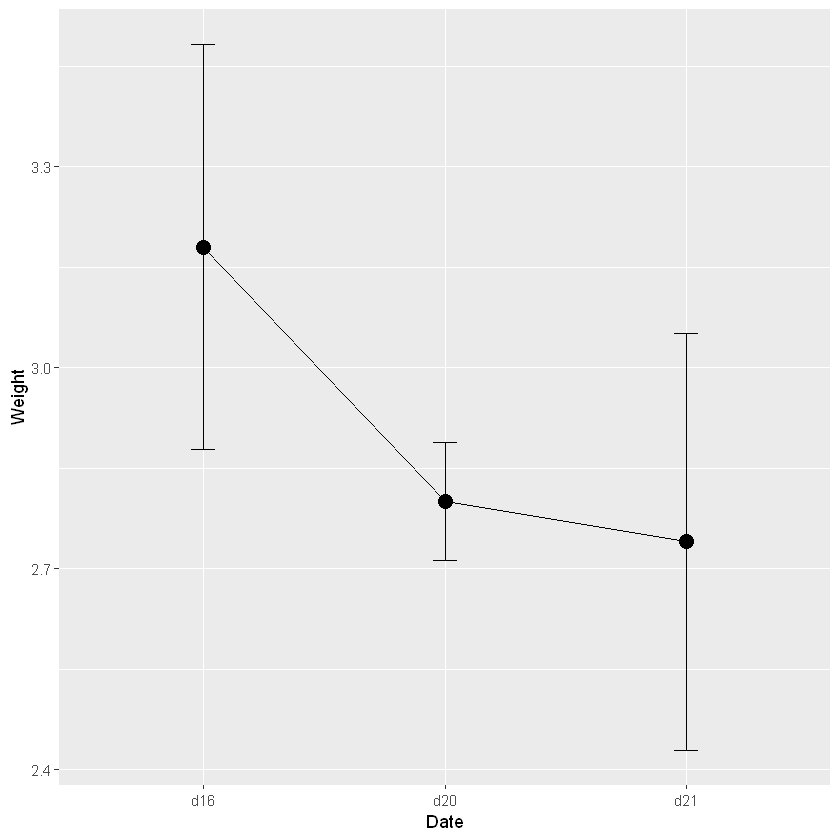

In [58]:
ce <- subset(cabbage_exp, Cultivar == 'c39')
ggplot(ce, aes(x = Date, y = Weight)) +
  geom_line(aes(group = 1)) + # note that x variable is a factor
  geom_point(size = 4) +
  geom_errorbar(aes(ymin = Weight - se, ymax = Weight + se), width = 0.1)

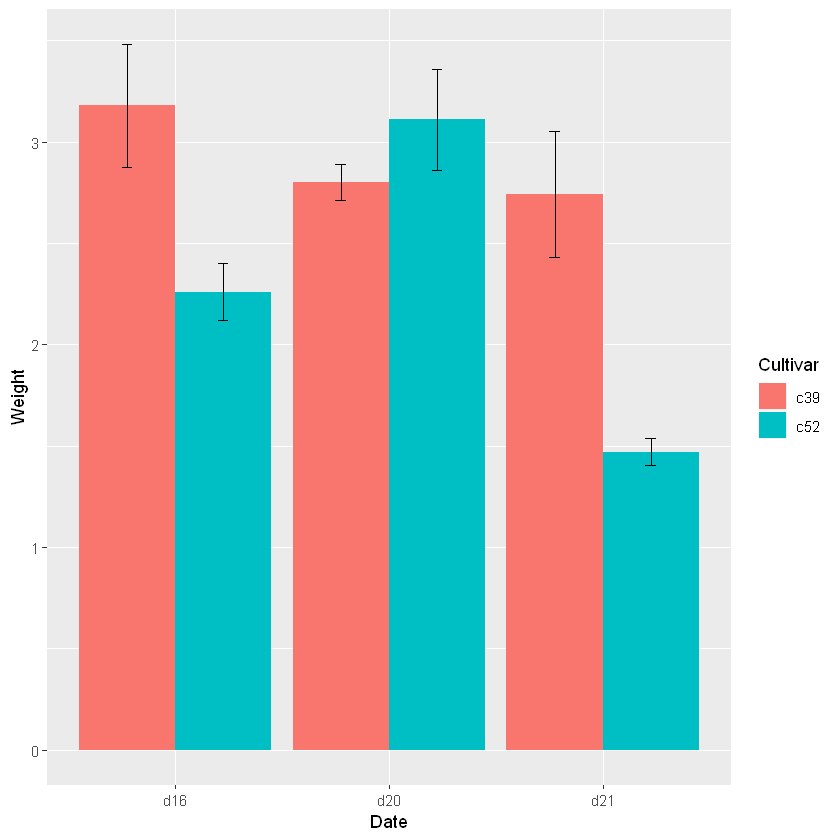

In [60]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) +
  geom_col(position = 'dodge') +
  geom_errorbar(aes(ymin = Weight - se, ymax = Weight + se), 
                position = position_dodge(0.9), width = 0.1)

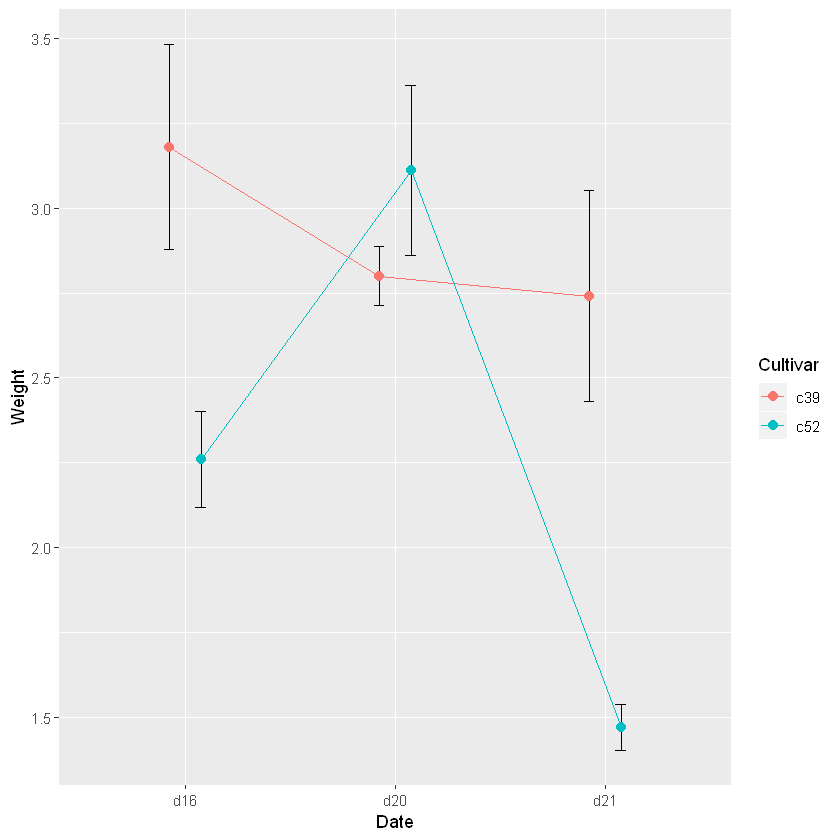

In [61]:
pd <- position_dodge(0.3) # save the dodge spec.. We can use it repeatedly
ggplot(cabbage_exp, aes(x = Date, y = Weight, color = Cultivar, group = Cultivar)) +
  geom_errorbar(aes(ymin = Weight - se, ymax = Weight + se),
                width = 0.1, size = 0.25, color = 'black', position = pd) +
  geom_line(position = pd) +
  geom_point(position = pd, size = 2.5)

- geom_text()를 이용하여 각 facet에 다른 text label를 표현.
-annotate()을 적용할 경우, 모든 facet에 동일한 text label이 적용됨에 유의할 것

In [64]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


drv,label
4,4륜구동
f,전륜구동
r,후륜구동


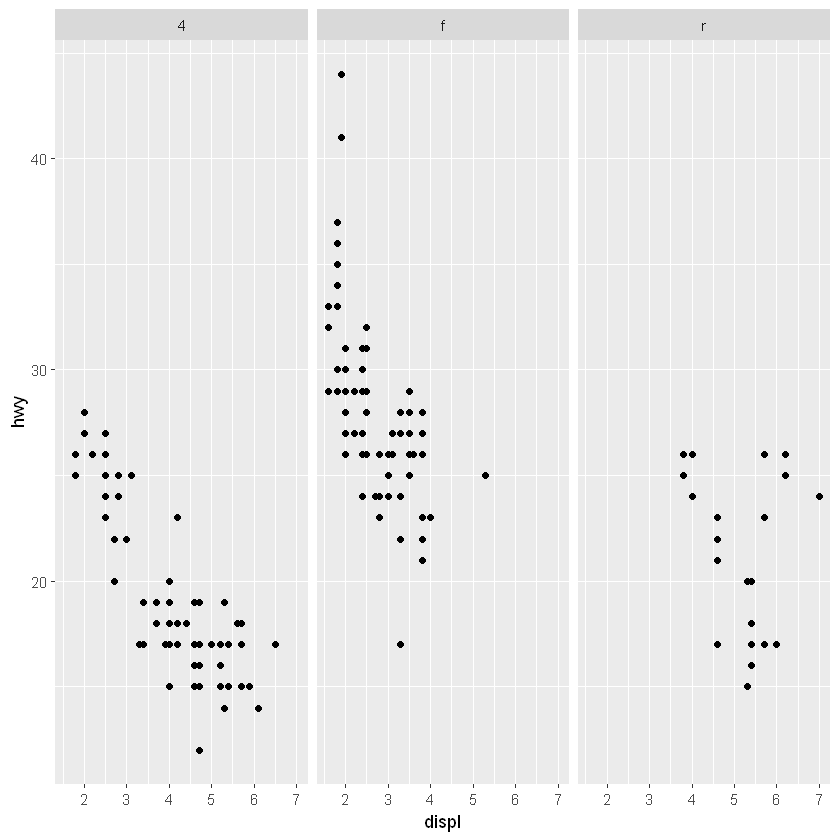

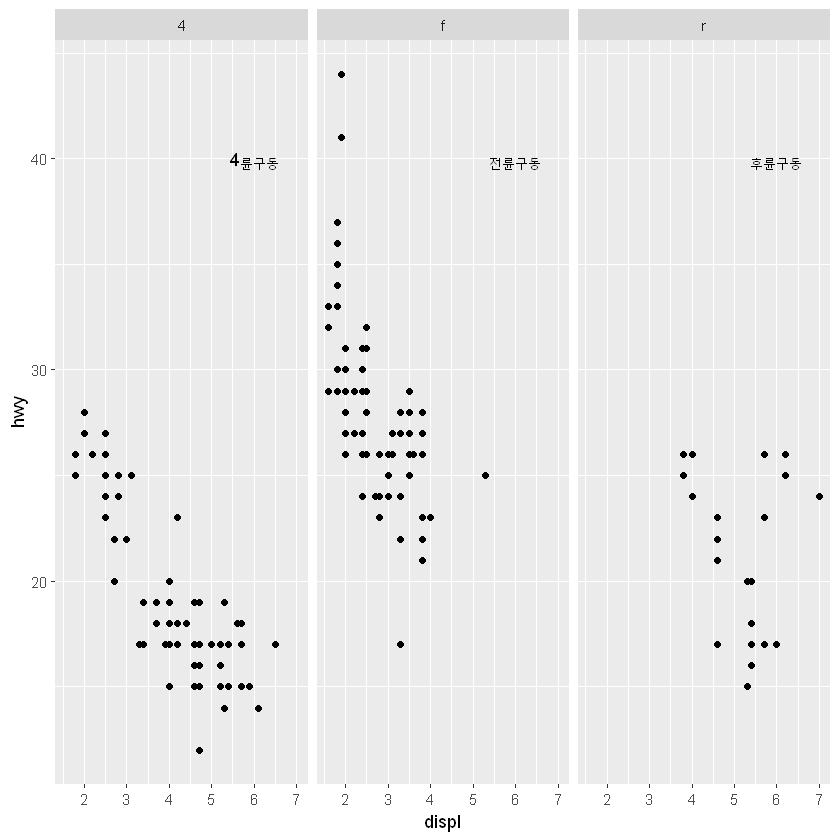

In [70]:
# 4륜구동, 전륜구동, 후륜구동
# 구동 방식에 따른 분포
# 전륜구동이 연비가 높다
# 후륜구동이 대형차가 많기 떄문에 연비가 낮다
# x축 
p <- ggplot(mpg, aes(x = displ, y = hwy)) + geom_point() +
    facet_grid(. ~ drv)
p
f_labels <- data.frame(drv = c('4', 'f', 'r'), label = c('4륜구동', '전륜구동', '후륜구동'))
f_labels

p + geom_text(x = 6, y = 40,
             aes(label = label), data = f_labels)